CREATING VISUALISATIONS (FOR THE APP)

In [1]:
# initialisations

import pandas as pd

# when running, change to own local paths
activities_review = pd.read_json('../categories/activities_review.json')
beauty_review = pd.read_json('../categories/beauty_review.json')
food_review = pd.read_json('../categories/food_review.json')
health_review = pd.read_json('../categories/health_review.json')
nightlife_review = pd.read_json('../categories/nightlife_review.json')
pets_review = pd.read_json('../categories/pets_review.json')
services_review = pd.read_json('../categories/services_review.json')
stores_review = pd.read_json('../categories/stores_review.json')

activities = (' '.join(activities_review['text'].dropna()))
beauty = (' '.join(beauty_review['text'].dropna()))
food = (' '.join(food_review['text'].dropna()))
health = (' '.join(health_review['text'].dropna()))
nightlife = (' '.join(nightlife_review['text'].dropna()))
pets = (' '.join(pets_review['text'].dropna()))
services = (' '.join(services_review['text'].dropna()))
stores = (' '.join(stores_review['text'].dropna()))

# comparison list for corpus
all = ' '.join([activities, beauty, food, health, nightlife, pets, services, stores])

# number of words
n = 50

In [ ]:
# deleting unnecessary dataframes

del activities_review
del beauty_review
del food_review
del health_review
del pets_review
del nightlife_review
del services_review
del stores_review

In [2]:
# generating and plotting word clouds w/ n words

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
from os import path
import PIL.ImageOps

def generate_wordcloud(category):
    corpus = [category, all]
    vectorizer = TfidfVectorizer()
    x = vectorizer.fit_transform(corpus)
    vectorizer.get_feature_names_out()

    i = np.flip(np.argsort(x[0, :].A)[0][-n:])
    scores = np.flip(np.sort(x[0, :].A)[0][-n:])
    words = vectorizer.get_feature_names_out()[i]

    # circular mask
    j, k = np.ogrid[:1000, :1000]
    mask = (j-500)**2 + (k-500)**2 > 400**2
    mask = 255 * mask.astype(int)

    wordcloud = WordCloud(background_color="white", width=2000, height=2000, scale=4, mask=mask)
    wordcloud.generate_from_frequencies(dict(zip(words, scores)))
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

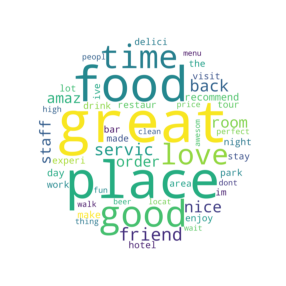

In [3]:
# activities wordcloud

generate_wordcloud(activities)

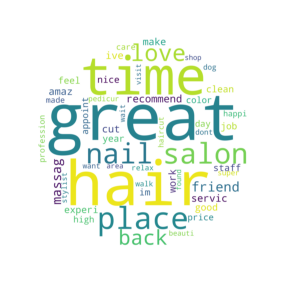

In [4]:
# beauty wordcloud

generate_wordcloud(beauty)

In [ ]:
# food wordcloud

generate_wordcloud(food)

In [9]:
# health wordcloud

generate_wordcloud(health)

In [ ]:
# nightlife wordcloud

generate_wordcloud(nightlife)

In [ ]:
# pets wordcloud

generate_wordcloud(pets)

In [ ]:
# services wordcloud

generate_wordcloud(services)

In [ ]:
# stores wordcloud

generate_wordcloud(stores)

GRAPHS

In [1]:
import pandas as pd
# when running, change to own local path
activities = pd.read_json('../filut/activities_review.json')

<Figure size 792x432 with 0 Axes>

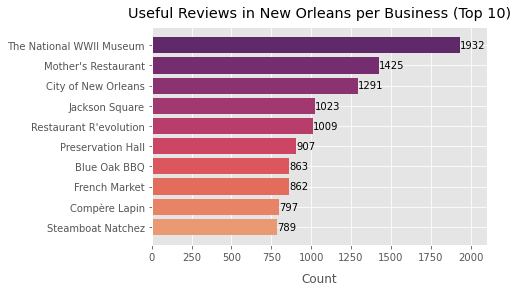

In [4]:
# counting useful reviews by city (top 10) - New Orleans

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

temp = activities.loc[activities['city'] == 'New Orleans']
grouped = temp.groupby('name')['useful'].sum().sort_values(ascending=False)[:10]
# flipping the dataframe
grouped = grouped[::-1]

plt.figure(figsize=(11,6))
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.barh(grouped.index.values, grouped.values, color=sns.color_palette("flare", len(grouped)))
plt.xlabel('Count', labelpad=10)
plt.title('Useful Reviews in New Orleans per Business (Top 10)', loc='center', pad=10)
plt.xlim(0, 2100)
plt.margins(x=20)
for i, v in enumerate(grouped):
    ax.text(v+1, int(i), str(v), verticalalignment='center')

<Figure size 792x432 with 0 Axes>

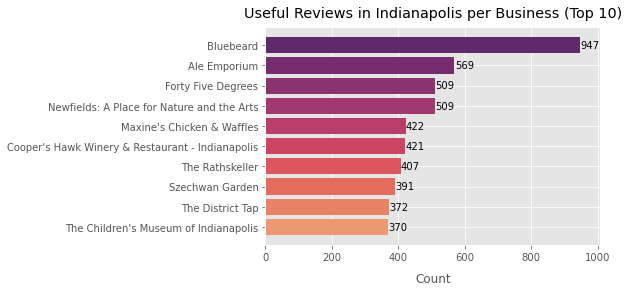

In [8]:
# counting useful reviews by city (top 10) - Indianapolis

%matplotlib inline

temp = activities.loc[activities['city'] == 'Indianapolis']
grouped = temp.groupby('name')['useful'].sum().sort_values(ascending=False)[:10]
# flipping the dataframe
grouped = grouped[::-1]

plt.figure(figsize=(11,6))
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.barh(grouped.index.values, grouped.values, color=sns.color_palette("flare", len(grouped)))
plt.xlabel('Count', labelpad=10)
plt.title('Useful Reviews in Indianapolis per Business (Top 10)', loc='center', pad=10)
plt.xlim(0, 1008)
plt.margins(x=20)
for i, v in enumerate(grouped):
    ax.text(v+1, int(i), str(v), verticalalignment='center')

In [9]:
# when running, change to own local path
services = pd.read_json('../filut/services_review.json')

<Figure size 792x432 with 0 Axes>

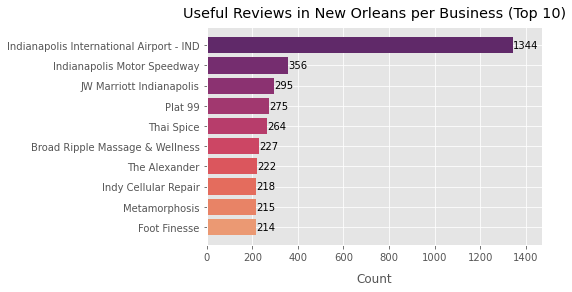

In [13]:
# counting useful reviews by city (top 10) - New Orleans

%matplotlib inline

temp = services.loc[services['city'] == 'Indianapolis']
grouped = temp.groupby('name')['useful'].sum().sort_values(ascending=False)[:10]
# flipping the dataframe
grouped = grouped[::-1]

plt.figure(figsize=(11,6))
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.barh(grouped.index.values, grouped.values, color=sns.color_palette("flare", len(grouped)))
plt.xlabel('Count', labelpad=10)
plt.title('Useful Reviews in New Orleans per Business (Top 10)', loc='center', pad=10)
plt.xlim(0, 1470)
plt.margins(x=20)
for i, v in enumerate(grouped):
    ax.text(v+1, int(i), str(v), verticalalignment='center')